#Problem Statement:

Objective:

You are given a noisy image (with Gaussian and Salt-and-Pepper noise). Your task is to clean the image using three different filters: Gaussian Filter, Median Filter, and Bilateral Filter. After cleaning, you should compare the results and identify which filter works best for different types of noise.

#Practical Solution in Code:

The following Python code demonstrates how to apply these filters using OpenCV to clean a noisy image. We will first introduce the image noise and then apply the filters.

Step-by-Step Explanation:

Import Libraries:

 We will use OpenCV for applying filters and matplotlib for visualizing the results.

Generate a Noisy Image: We'll add Gaussian noise and Salt-and-Pepper noise to a sample image.

Apply Filters:

 We will apply three filters: Gaussian, Median, and Bilateral.

Show Results:

Visualize the original noisy image and the filtered images.

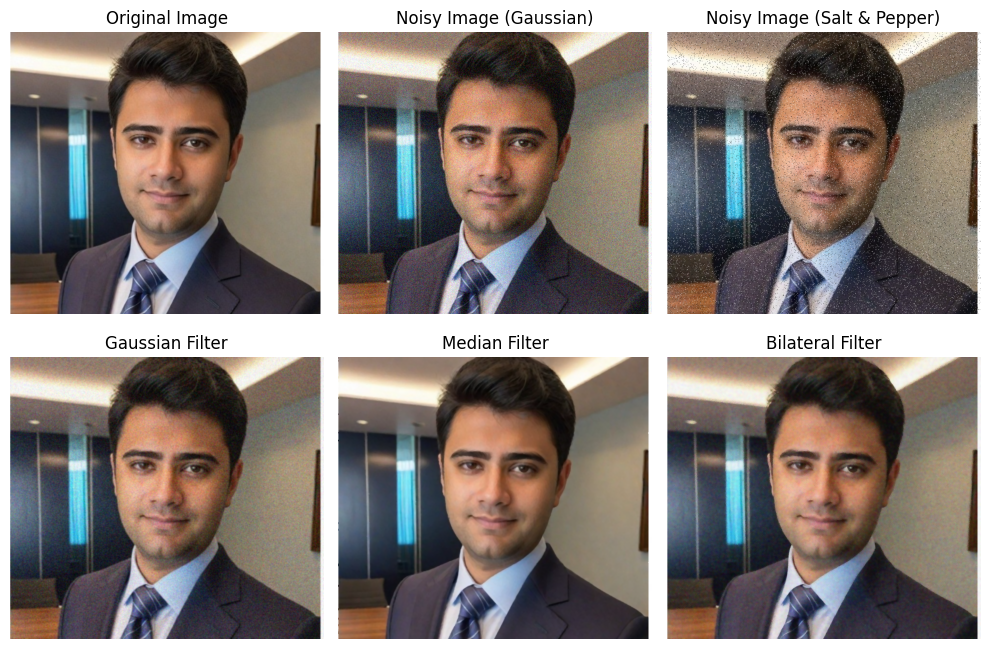

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the original image
image = cv2.imread('123.PNG')  # Replace with a path to your image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display in matplotlib

# Step 2: Add Gaussian noise to the image
def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))  # Generate Gaussian noise
    noisy = np.clip(image + gauss, 0, 255)  # Add noise and ensure values stay in the valid range
    return noisy.astype(np.uint8)

# Add Gaussian Noise
noisy_image_gaussian = add_gaussian_noise(image)

# Step 3: Add Salt-and-Pepper noise to the image
def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """Add Salt and Pepper noise to the image."""
    noisy = image.copy()
    total_pixels = image.size
    salt_pixels = int(salt_prob * total_pixels)
    pepper_pixels = int(pepper_prob * total_pixels)

    # Add Salt noise (random white pixels)
    salt_coords = [np.random.randint(0, i-1, salt_pixels) for i in image.shape]
    noisy[salt_coords[0], salt_coords[1], :] = 255

    # Add Pepper noise (random black pixels)
    pepper_coords = [np.random.randint(0, i-1, pepper_pixels) for i in image.shape]
    noisy[pepper_coords[0], pepper_coords[1], :] = 0

    return noisy

# Add Salt-and-Pepper Noise
noisy_image_salt_pepper = add_salt_and_pepper_noise(image)

# Step 4: Apply Gaussian Blur
gaussian_blurred = cv2.GaussianBlur(noisy_image_gaussian, (5, 5), 0)

# Step 5: Apply Median Filter
median_filtered = cv2.medianBlur(noisy_image_salt_pepper, 5)

# Step 6: Apply Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(noisy_image_gaussian, 9, 75, 75)

# Step 7: Plot the original, noisy, and filtered images
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Noisy Image with Gaussian Noise
plt.subplot(3, 3, 2)
plt.imshow(noisy_image_gaussian)
plt.title("Noisy Image (Gaussian)")
plt.axis('off')

# Noisy Image with Salt-and-Pepper Noise
plt.subplot(3, 3, 3)
plt.imshow(noisy_image_salt_pepper)
plt.title("Noisy Image (Salt & Pepper)")
plt.axis('off')

# Gaussian Filtered Image
plt.subplot(3, 3, 4)
plt.imshow(gaussian_blurred)
plt.title("Gaussian Filter")
plt.axis('off')

# Median Filtered Image
plt.subplot(3, 3, 5)
plt.imshow(median_filtered)
plt.title("Median Filter")
plt.axis('off')

# Bilateral Filtered Image
plt.subplot(3, 3, 6)
plt.imshow(bilateral_filtered)
plt.title("Bilateral Filter")
plt.axis('off')

plt.tight_layout()
plt.show()


#Code Explanation:

Image Loading:

The image is loaded using cv2.imread() and converted to RGB for displaying with matplotlib.

Noise Addition:

Gaussian Noise:

 We use np.random.normal() to generate Gaussian noise and add it to the image.

Salt-and-Pepper Noise:

We manually introduce black and white pixels to simulate salt-and-pepper noise.

Filter Application:

Gaussian Filter:

The cv2.GaussianBlur() function is used to apply a Gaussian filter, which smooths the image and reduces Gaussian noise.

Median Filter:

The cv2.medianBlur() function replaces each pixel with the median of neighboring pixels.

This is particularly effective for removing salt-and-pepper noise.

Bilateral Filter:

The cv2.bilateralFilter() function smooths the image while preserving edges,

which is useful when you want to reduce noise without blurring edges too much.

Displaying Images:

We use matplotlib to display the original image, noisy images, and filtered results in a 3x3 grid for comparison.

Expected Output:

The output will show the following:

Original Image (unaffected by noise).

Noisy Image with Gaussian Noise: The image will have random pixel variations across the entire image.

Noisy Image with Salt-and-Pepper Noise: You’ll see random black and white pixels scattered throughout the image.

Filtered Images:

Gaussian Filter:

 The image will be smoothed, but edges might be blurred.

Median Filter:

 This filter will reduce the salt-and-pepper noise without significantly blurring the edges.

Bilateral Filter:

This filter will smooth out noise but preserve edges better than the Gaussian filter.

Conclusion:

Gaussian Filter is effective for removing Gaussian noise, but it can blur edges.

Median Filter is ideal for salt-and-pepper noise as it preserves edges better.

Bilateral Filter provides a good trade-off between noise reduction and edge preservation, especially in images with both Gaussian and salt-and-pepper noise.